In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 기본 scheme 말고 seaborn scheme 세팅
# font size 설정하는 번거로움 X
plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
df_train = pd.read_csv('../input/titanic/train.csv')
df_test = pd.read_csv('../input/titanic/test.csv')

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# 12개의 변수
df_train.shape

(891, 12)

In [7]:
# 변수 반환
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
# \t 공백, \n 줄바꿈
# :> 오른쪽 정렬, :< 왼쪽 정렬, : 정렬 안 함, :. 소수점
for col in df_train.columns:
    msg = 'column:{:>10}\t Percent of NaN value:{:.2f}%'.format(col,100*(df_train[col].isnull().sum()/df_train[col].shape[0]))
    print(msg)

column:PassengerId	 Percent of NaN value:0.00%
column:  Survived	 Percent of NaN value:0.00%
column:    Pclass	 Percent of NaN value:0.00%
column:      Name	 Percent of NaN value:0.00%
column:       Sex	 Percent of NaN value:0.00%
column:       Age	 Percent of NaN value:19.87%
column:     SibSp	 Percent of NaN value:0.00%
column:     Parch	 Percent of NaN value:0.00%
column:    Ticket	 Percent of NaN value:0.00%
column:      Fare	 Percent of NaN value:0.00%
column:     Cabin	 Percent of NaN value:77.10%
column:  Embarked	 Percent of NaN value:0.22%


In [9]:
# shape[0] 행 반환, shape[1] 열 반환
df_train[col].shape[0]

891

In [10]:
# 현재 선택된 column 알려줌
col

'Embarked'

In [11]:
# column 값 전부 전달
df_train[col]

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [12]:
# pandas type 알려줌
# series : index 와 value 로 이루어짐, 여러 개 묶이면 frame
type(df_train[col])

pandas.core.series.Series

In [13]:
# Embarked 에 null 값이 2개
df_train[col].isnull().sum()

2

In [14]:
# null data percent
# 그냥 shape 치면 array 로 나옴 (list 형태), 따라서 round 사용 불가
# shape [0] 치면 아래처럼 나옴
round(df_train[col].isnull().sum()/df_train[col].shape[0],4)

0.0022

In [15]:
# esc 또는 cell 선택 후, F 누르면 글자 대체 가능
for col in df_test.columns:
    msg = 'column:{:>10}\t Percent of NaN value: {:.2f}%'.format(col,100*(df_test[col].isnull().sum()/df_test[col].shape[0]))
    print(msg)

column:PassengerId	 Percent of NaN value: 0.00%
column:    Pclass	 Percent of NaN value: 0.00%
column:      Name	 Percent of NaN value: 0.00%
column:       Sex	 Percent of NaN value: 0.00%
column:       Age	 Percent of NaN value: 20.57%
column:     SibSp	 Percent of NaN value: 0.00%
column:     Parch	 Percent of NaN value: 0.00%
column:    Ticket	 Percent of NaN value: 0.00%
column:      Fare	 Percent of NaN value: 0.24%
column:     Cabin	 Percent of NaN value: 78.23%
column:  Embarked	 Percent of NaN value: 0.00%


In [16]:
# iloc [row,column]
# : 는 전체를 뜻함
df_train.iloc[:,:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [17]:
df_train.iloc[:,3:5]

,Name,Sex
0,"Braund, Mr. Owen Harris",male
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female
2,"Heikkinen, Miss. Laina",female
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female
4,"Allen, Mr. William Henry",male
...,...,...
886,"Montvila, Rev. Juozas",male
887,"Graham, Miss. Margaret Edith",female
888,"Johnston, Miss. Catherine Helen ""Carrie""",female
889,"Behr, Mr. Karl Howell",male


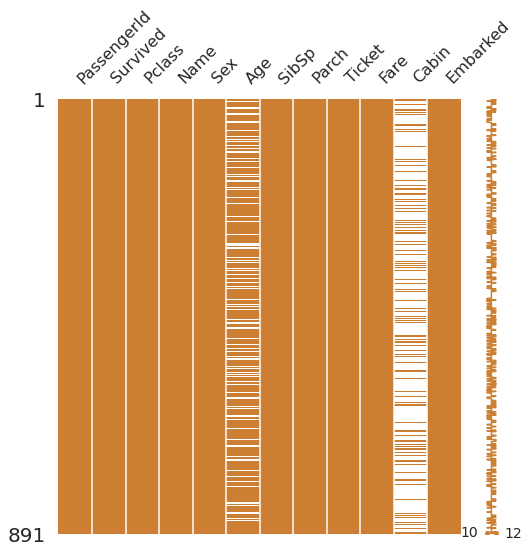

In [18]:
msno.matrix(df=df_train.iloc[:,:],figsize=(8,8),color=(0.8,0.5,0.2))

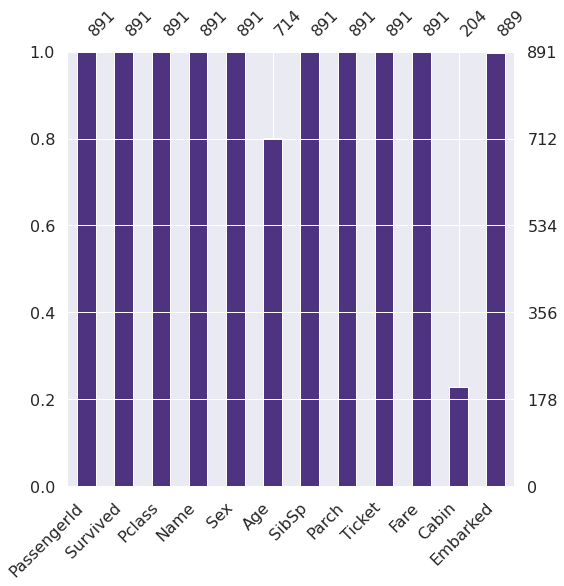

In [19]:
msno.bar(df=df_train.iloc[:,:],figsize=(8,8),color=(0.3,0.2,0.5))

In [20]:
# count: survived 의 개수
df_train['Survived'].count

<bound method Series.count of 0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64>

In [21]:
# value_counts : Survived 의 각 label 개수
df_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

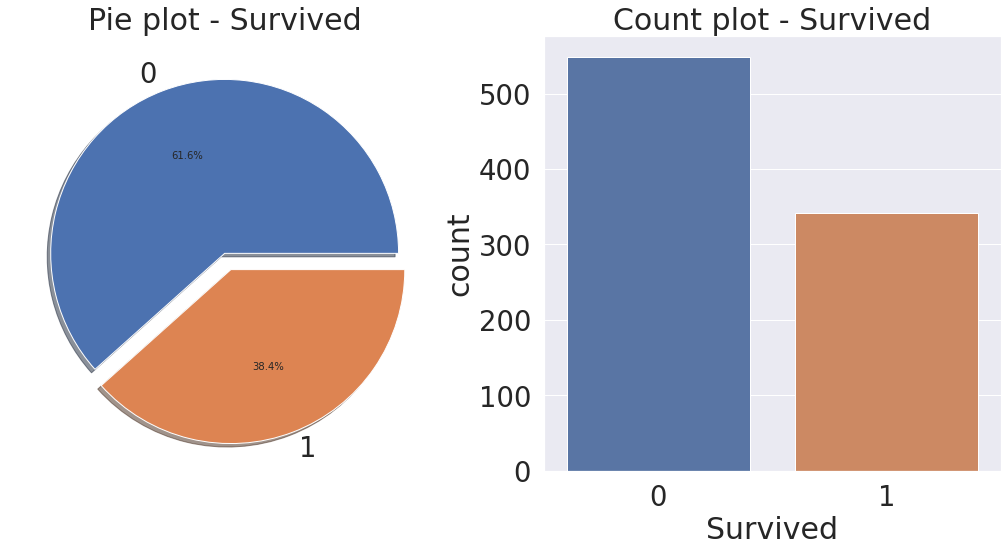

In [22]:
# 도화지 그리기 : 1,2 -> 1열 2행
f, ax = plt.subplots(1,2,figsize=(18,8))
# series 라서 다양한 plot 만들기 가능
# explode: 파이 조각이 돌출되는 크기, 0 이면 돌출되지 않음
# autopct: 파이 조각의 전체 대비 백분율
df_train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Pie plot - Survived')
# y축 label 제거
ax[0].set_ylabel('')
# countplot 명령을 사용하면 각 카테고리 값별로 데이터가 얼마나 있는지 표시 가능
# data frame 에만 사용 가능
sns.countplot('Survived',data=df_train,ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

In [23]:
ax

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f04080da0d0>,
      dtype=object)

## 2.1 Pclass

In [24]:
# count : Survived 의 sample 개수 반환
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [25]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=False).count()

,Pclass,Survived
0,1,216
1,2,184
2,3,491


In [26]:
# sum: Survived 의 1 값의 합, 즉 생존자 수
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [27]:
# margins = True : All 추가
pd.crosstab(df_train['Pclass'],df_train['Survived'],margins=True).style.background_gradient(cmap='cool')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [28]:
round(df_train[['Pclass','Survived']].groupby(['Pclass']).mean(),2)

,Survived
Pclass,
1,0.63
2,0.47
3,0.24


In [29]:
# sort_values : 순서 정리, ascending=False : 내림차순
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).mean().sort_values(by='Survived',ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [30]:
type(df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).mean().sort_values(by='Survived',ascending=False))

pandas.core.frame.DataFrame

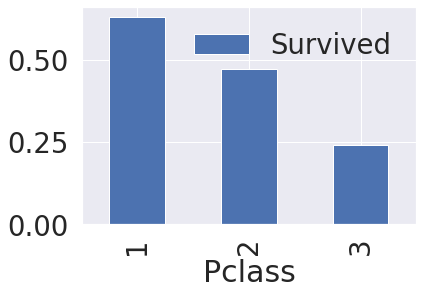

In [31]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).mean().sort_values(by='Survived',ascending=False).plot.bar()

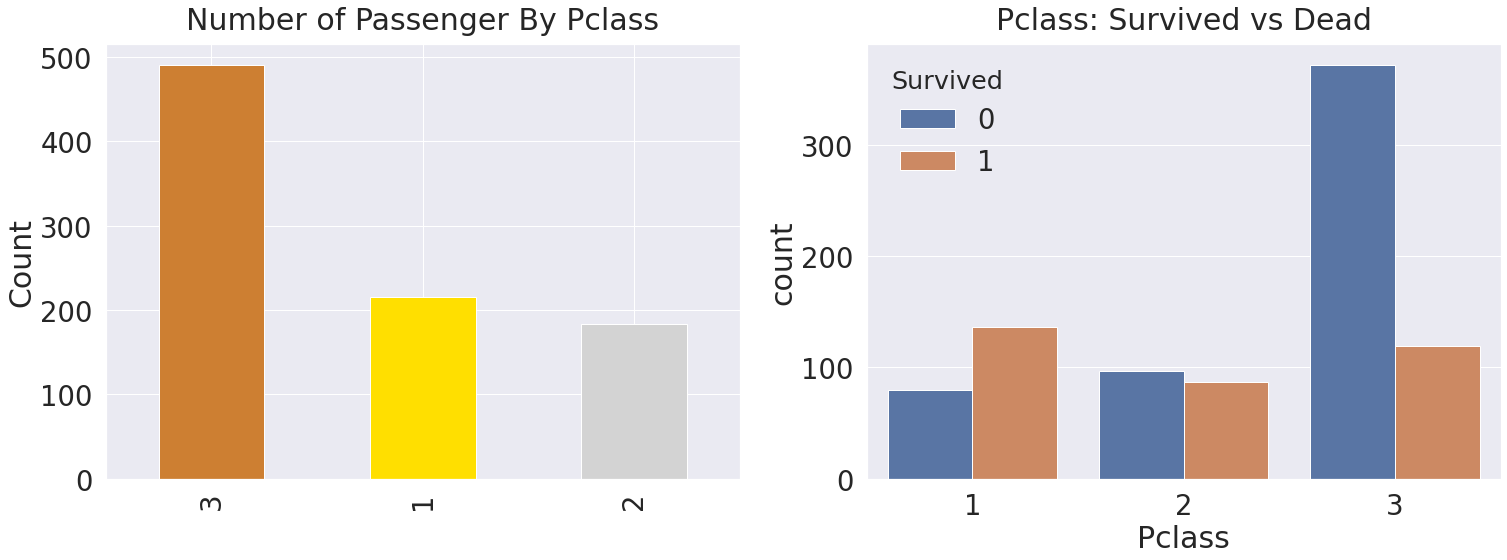

In [32]:
y_position = 1.02
f, ax = plt.subplots(1,2,figsize=(25,8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number of Passenger By Pclass',y=y_position)
ax[0].set_ylabel('Count')

# hue : 생존자, 사망자를 구분하여 반환
sns.countplot('Pclass',hue='Survived',data=df_train,ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead',y=y_position)

plt.show()

## 2.2 Sex

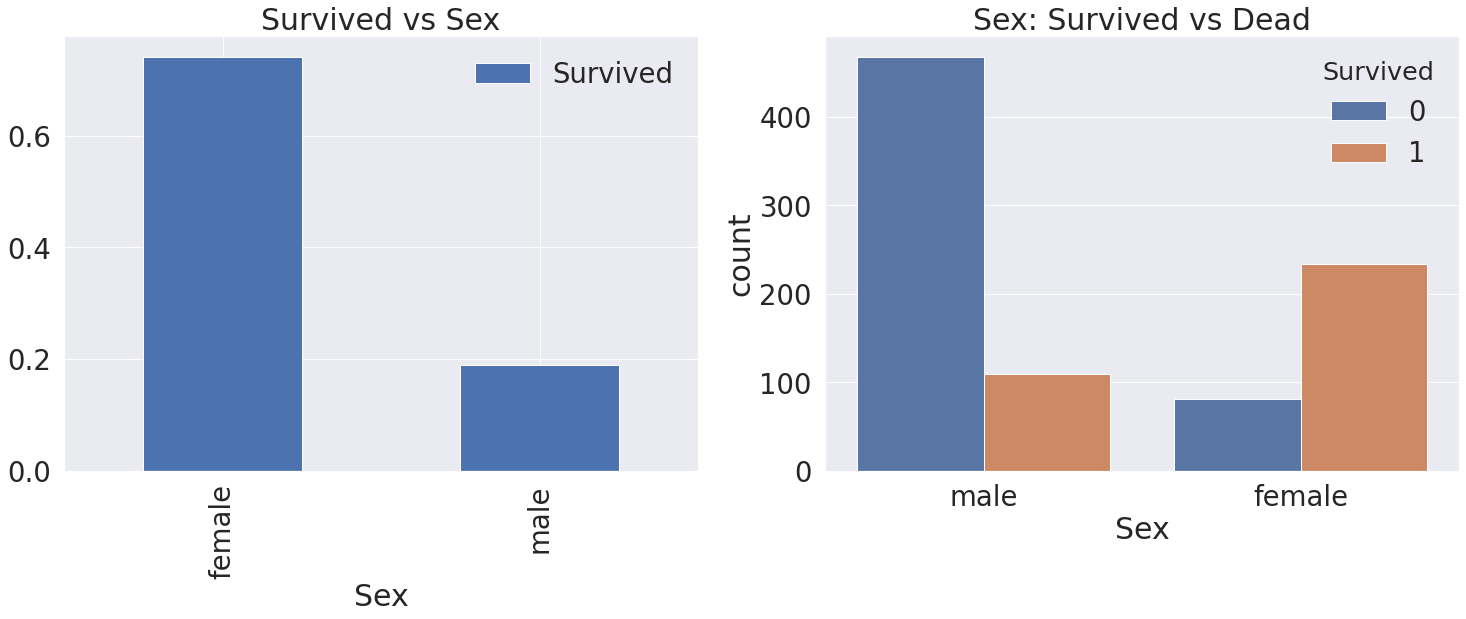

In [33]:
f, ax=plt.subplots(1,2,figsize=(25,8))
df_train[['Sex','Survived']].groupby(['Sex'],as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot('Sex',hue='Survived',data=df_train,ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')

plt.show()

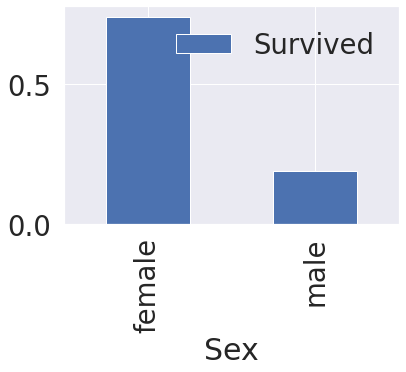

In [34]:
df_train[['Sex','Survived']].groupby(['Sex'],as_index=True).mean().plot.bar()

In [35]:
pd.crosstab(df_train['Sex'],df_train['Survived'],margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


## 2.3 Both Sex and Pclass

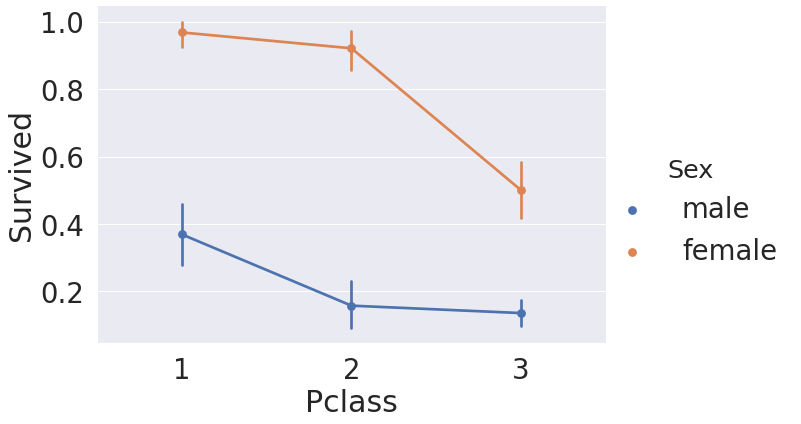

In [36]:
sns.factorplot('Pclass','Survived',hue='Sex',data=df_train, size=6, aspect=1.5)

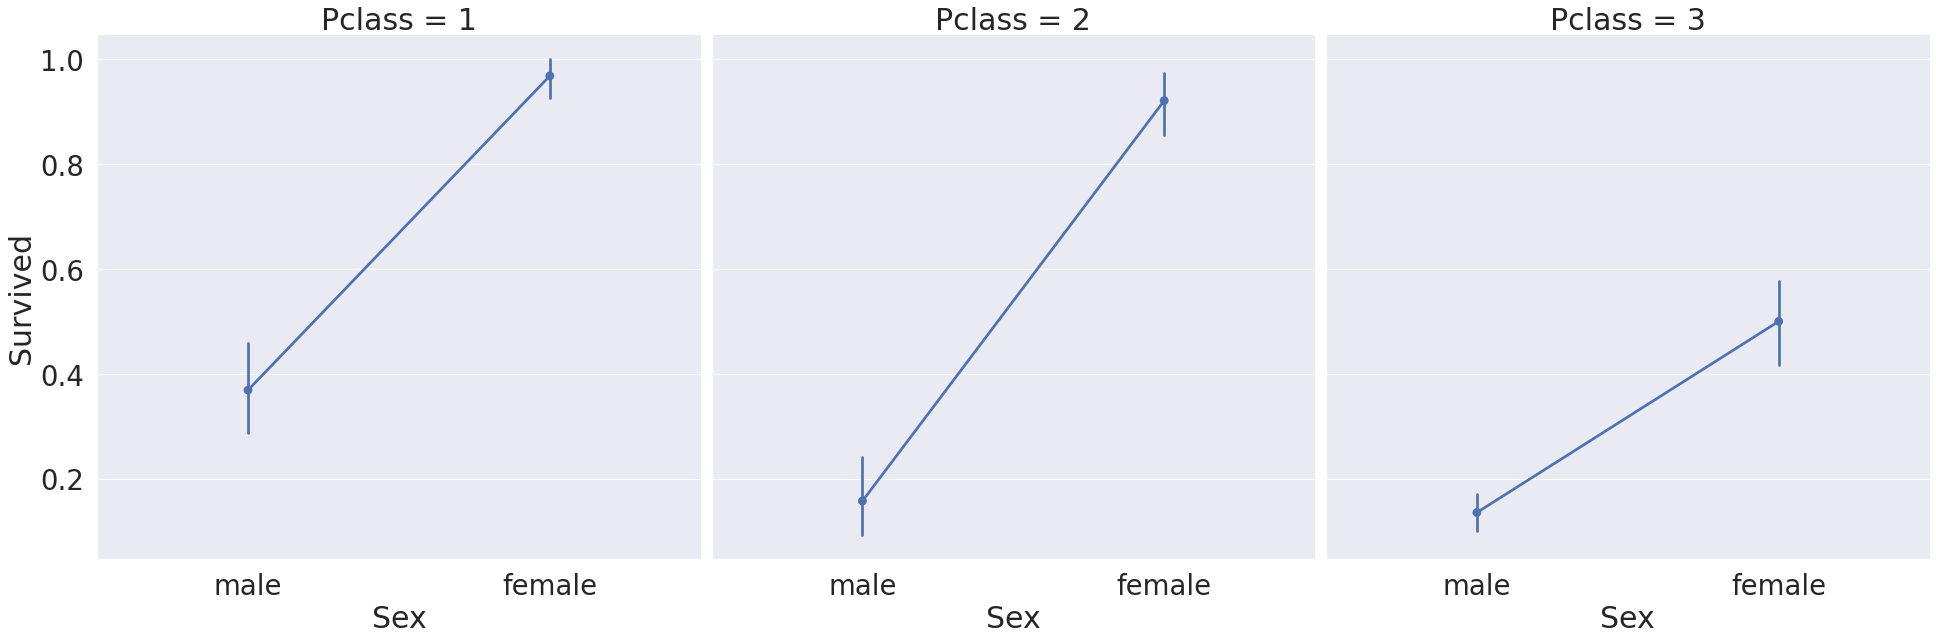

In [37]:
sns.factorplot(x='Sex',y='Survived',col='Pclass',data=df_train,saturation=.5,size=9,aspect=1)

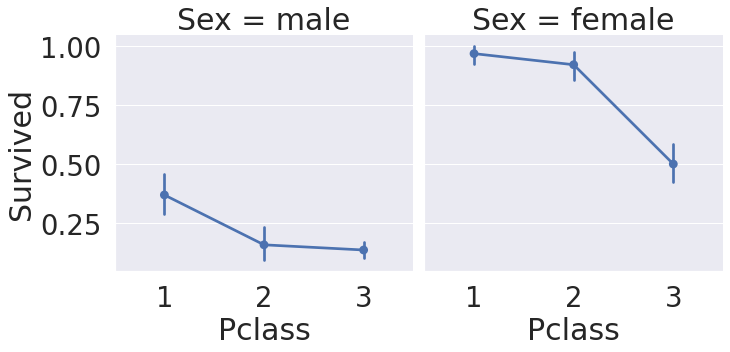

In [38]:
sns.factorplot(x='Pclass',y='Survived',col='Sex',data=df_train)

## Age

In [39]:
# 데이터 반환_방법 1
print('나이가 가장 많은 탑승객: {:.1f} years'.format(df_train['Age'].max()))

나이가 가장 많은 탑승객: 80.0 years


In [40]:
# 데이터 반환_방법 2
print('나이가 가장 많은 탑승객:', df_train['Age'].max(),'years')

나이가 가장 많은 탑승객: 80.0 years


In [41]:
# 데이터 반환_방법 3
a = df_train['Age'].max()
print(f'나이가 가장 많은 탑승객: {a} years')

나이가 가장 많은 탑승객: 80.0 years


In [42]:
print('나이가 가장 적은 탑승객: {:.1f} years'.format(df_train['Age'].min()))

나이가 가장 적은 탑승객: 0.4 years


In [43]:
print('나이가 가장 적은 탑승객:',df_train['Age'].min(),'years')

나이가 가장 적은 탑승객: 0.42 years


In [44]:
a = df_train['Age'].min()
print(f'나이가 가장 적은 탑승객: {a} years')

나이가 가장 적은 탑승객: 0.42 years


In [45]:
print('탑승객 평균 나이: {:.1f} years'.format(df_train['Age'].mean()))

탑승객 평균 나이: 29.7 years


In [46]:
print('탑승객 평균 나이:', df_train['Age'].mean(),'years')

탑승객 평균 나이: 29.69911764705882 years


In [47]:
a = round(df_train['Age'].mean(),2)
print(f'탑승객 평균 나이: {a} years')

탑승객 평균 나이: 29.7 years


In [48]:
df_train['Age'].max()

80.0

In [49]:
var = df_train['Age']

In [50]:
# 도화지를 까는 다양한 방법
#1 f = plt.figure(figsize=(10,10))
#2 f, ax = plt.subplots(1,1,figsize=(10,10))
#3 plt.figure(figsize=(10,10))

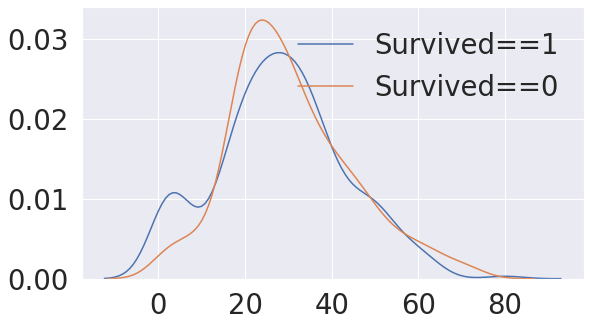

In [51]:
f, ax = plt.subplots(1,1,figsize=(9,5))
sns.kdeplot(df_train[df_train['Survived']==1]['Age'],ax=ax)
sns.kdeplot(df_train[df_train['Survived']==0]['Age'],ax=ax)
plt.legend(['Survived==1','Survived==0'])
plt.show()

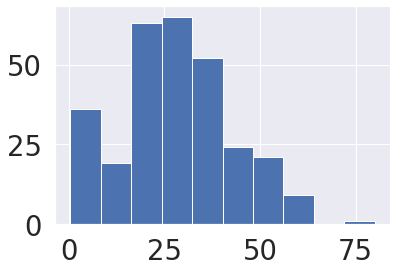

In [52]:
df_train[df_train['Survived']==1]['Age'].hist()

In [53]:
# indexing 하는 방법
#1
df_train.iloc[:,1]
#2
# iterrows는 현재 인덱스와 시리즈 정보가 반복
# https://wikidocs.net/78257
for row in df_train.iterrows():
    break

In [54]:
row

(0,
 PassengerId                          1
 Survived                             0
 Pclass                               3
 Name           Braund, Mr. Owen Harris
 Sex                               male
 Age                                 22
 SibSp                                1
 Parch                                0
 Ticket                       A/5 21171
 Fare                              7.25
 Cabin                              NaN
 Embarked                             S
 Name: 0, dtype: object)

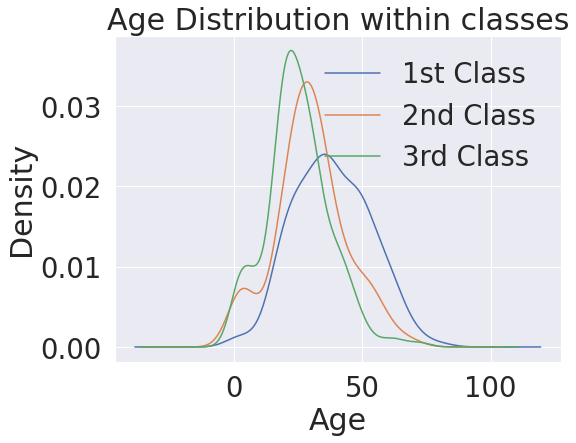

In [55]:
plt.figure(figsize=(8,6))
'''df_train['Age'][df_train['Pclass']==1].plot(kind='kde')
df_train['Age'][df_train['Pclass']==2].plot(kind='kde')
df_train['Age'][df_train['Pclass']==3].plot(kind='kde')'''
for i in range(1,4):
    df_train['Age'][df_train['Pclass']==i].plot(kind='kde')
plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class','2nd Class','3rd Class'])

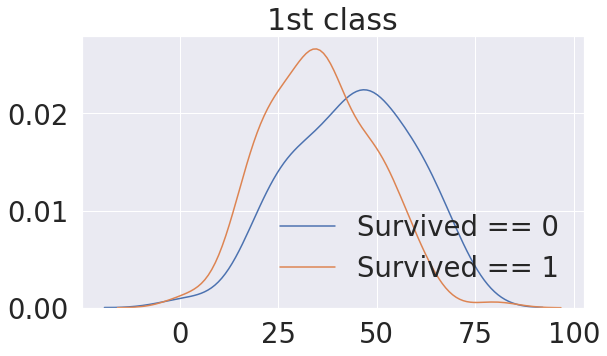

In [56]:
# Pclass = 1 인 탑승객들의 나이대별 생존자
fig, ax = plt.subplots(1,1,figsize=(9,5))
sns.kdeplot(df_train[(df_train['Survived']==0)&(df_train['Pclass']==1)]['Age'],ax=ax)
sns.kdeplot(df_train[(df_train['Survived']==1)&(df_train['Pclass']==1)]['Age'],ax=ax)
plt.legend(['Survived == 0','Survived == 1'])
plt.title('1st class')
plt.show()

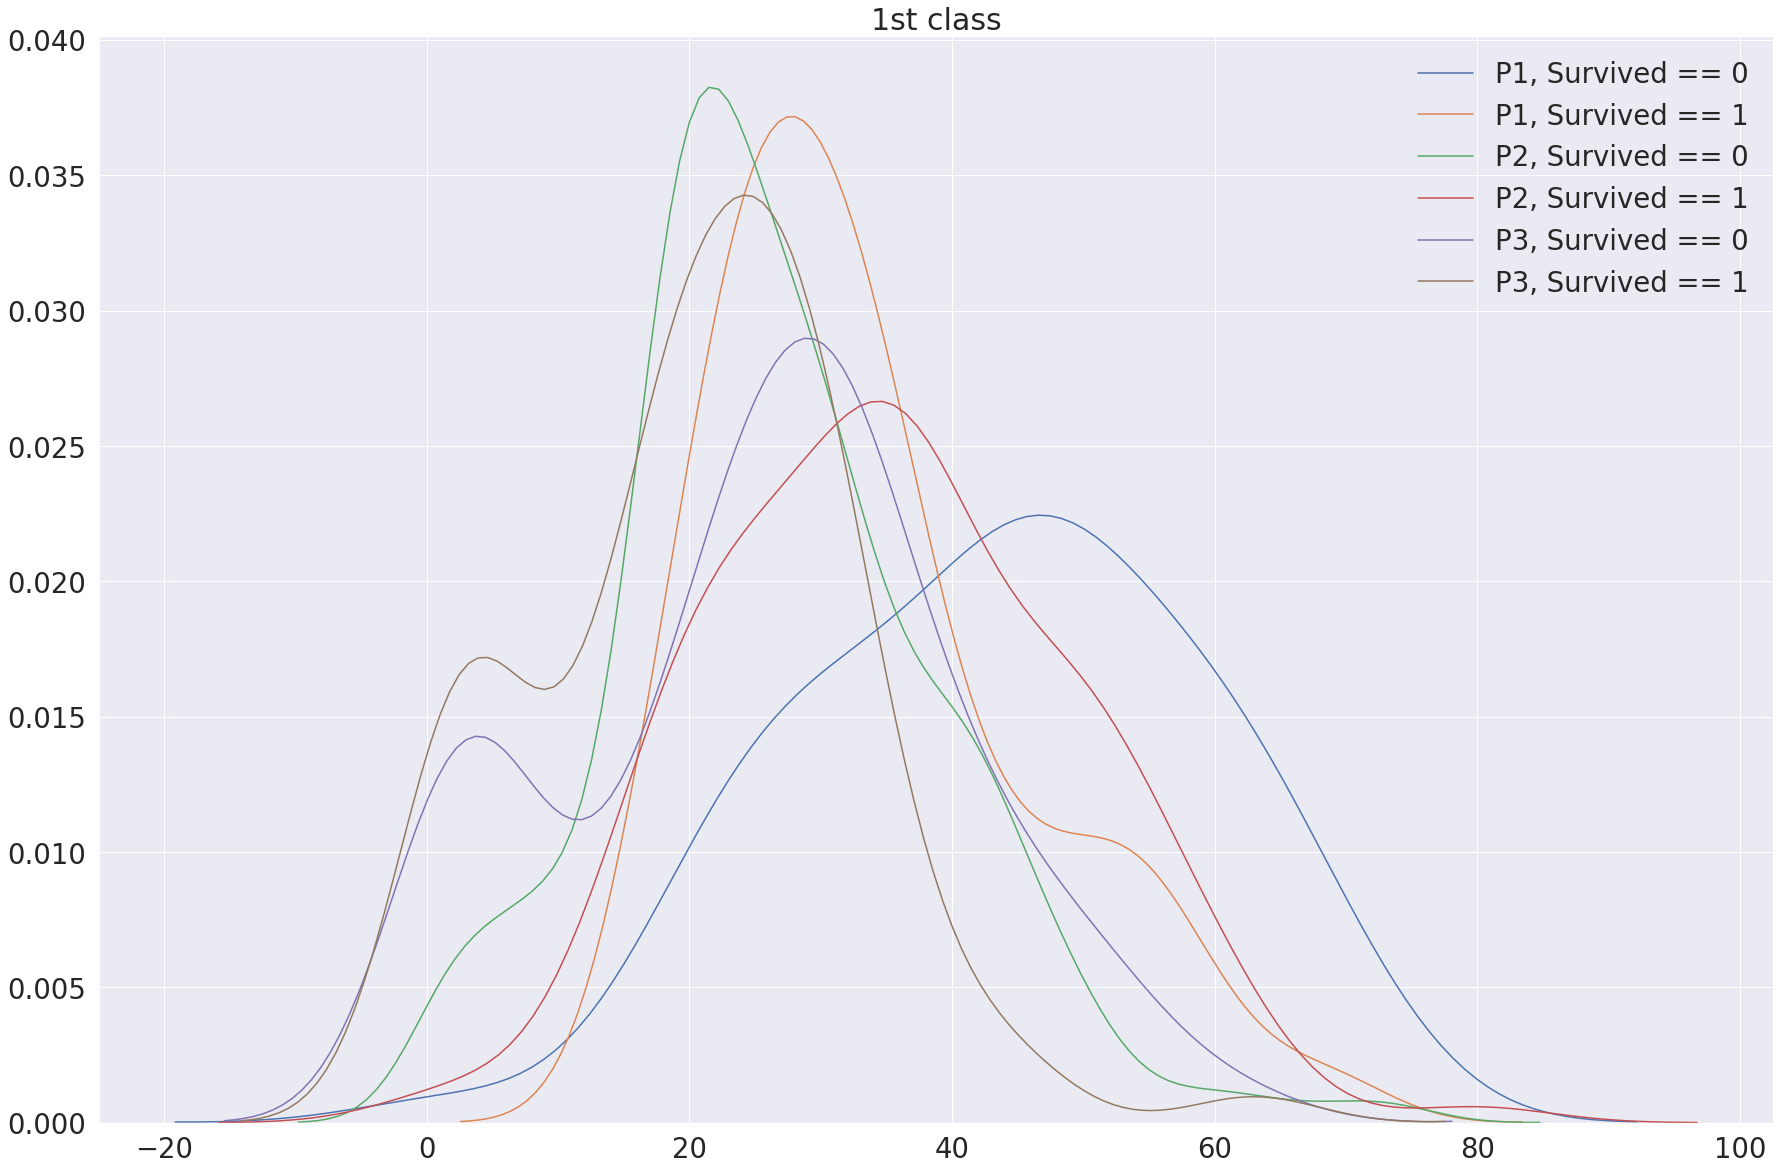

In [57]:
# for 문으로 묶기
fig, ax = plt.subplots(1,1,figsize=(30,20))
for i in range(0,2):
    for x in range(1,4):
        sns.kdeplot(df_train[(df_train['Survived']==i)&(df_train['Pclass']==x)]['Age'],ax=ax)
plt.legend(['P1, Survived == 0','P1, Survived == 1','P2, Survived == 0','P2, Survived == 1','P3, Survived == 0','P3, Survived == 1'])
plt.title('1st class')
plt.show()

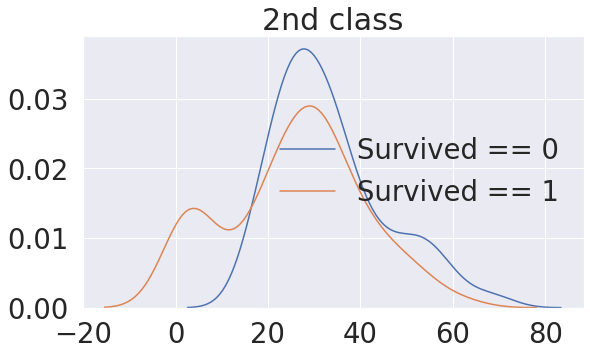

In [58]:
# Pclass = 2 인 사람들 중 나이대별 생존자
fig,ax = plt.subplots(1,1,figsize=(9,5))
sns.kdeplot(df_train[(df_train['Survived']==0) & (df_train['Pclass']==2)]['Age'],ax=ax)
sns.kdeplot(df_train[(df_train['Survived']==1) & (df_train['Pclass']==2)]['Age'],ax=ax)
plt.legend(['Survived == 0','Survived == 1'])
plt.title('2nd class')
plt.show()

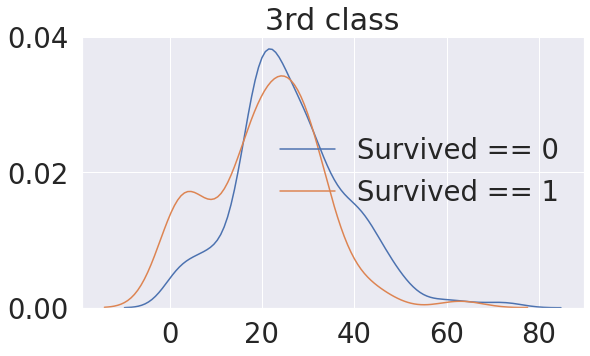

In [59]:
# Pclass = 3 인 사람들 중 나이대별 생존자
fig,ax = plt.subplots(1,1,figsize=(9,5))
sns.kdeplot(df_train[(df_train['Survived']==0) & (df_train['Pclass']==3)]['Age'],ax=ax)
sns.kdeplot(df_train[(df_train['Survived']==1) & (df_train['Pclass']==3)]['Age'],ax=ax)
plt.legend(['Survived == 0','Survived == 1'])
plt.title('3rd class')
plt.show()

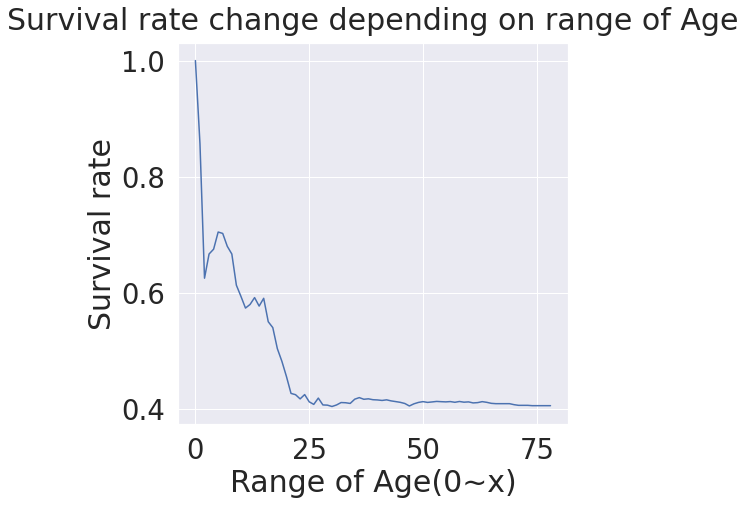

In [60]:
# age 의 ratio 를 다르게 했을 때 survival ratio 의 변화
change_age_range_survival_ratio = []
# append : 리스트에 요소 추가
for i in range(1,80):
    change_age_range_survival_ratio.append(df_train[df_train['Age']<i]['Survived'].sum()/len(df_train[df_train['Age']<i]['Survived']))
plt.figure(figsize=(7,7))
plt.plot(change_age_range_survival_ratio)
# y=1.02 그래프에서 title 의 위치를 변경
plt.title('Survival rate change depending on range of Age',y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

## Pclass,Sex,Age

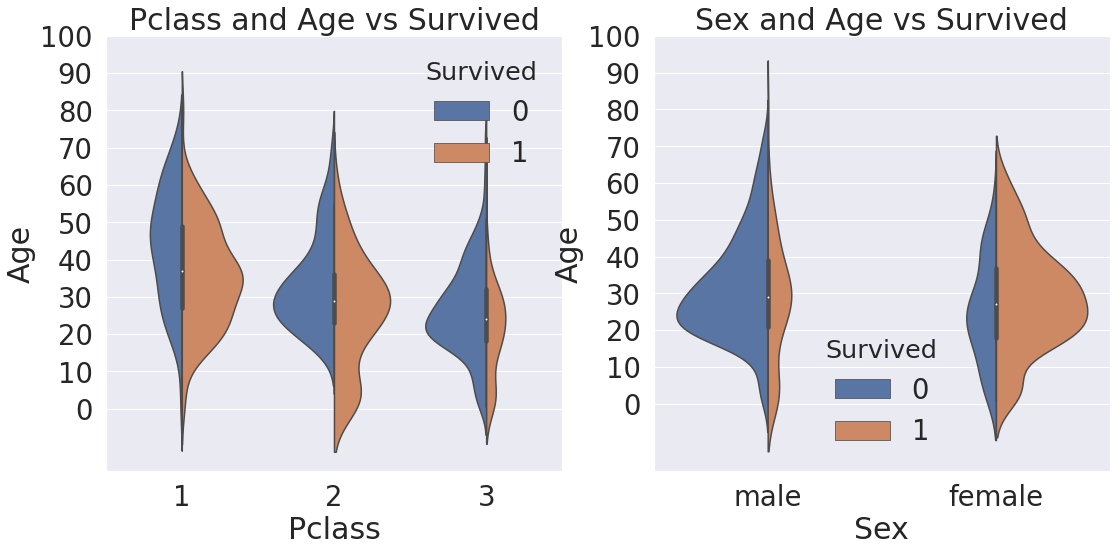

In [63]:
f, ax = plt.subplots(1,2,figsize=(18,8))
# split = false 0,1 따로 나눠서 표현
# scale = area 0 과 1의 분포 차이를 표현
# scale = count 0,1의 수적인 차이를 표현
sns.violinplot('Pclass','Age',hue='Survived',data=df_train, scale='count',split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
# tick (0,110,10), 10: 나이를 10 단위로 끊어줌
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=df_train, scale='count', split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

## Embarked

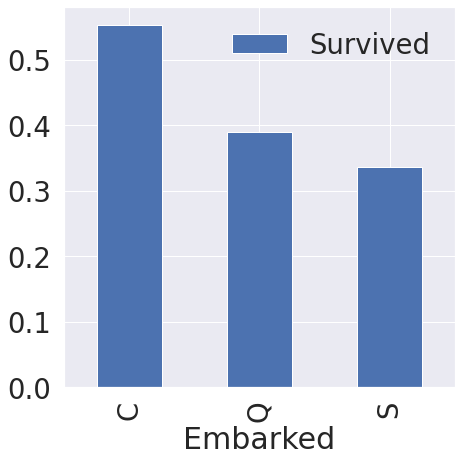

In [64]:
# sort_values : data frame 정렬
f, ax = plt.subplots(1, 1, figsize=(7, 7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

In [65]:
df_train[['Embarked','Survived']].groupby(['Embarked'],as_index=True).mean().sort_values(by='Survived',ascending=False)

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


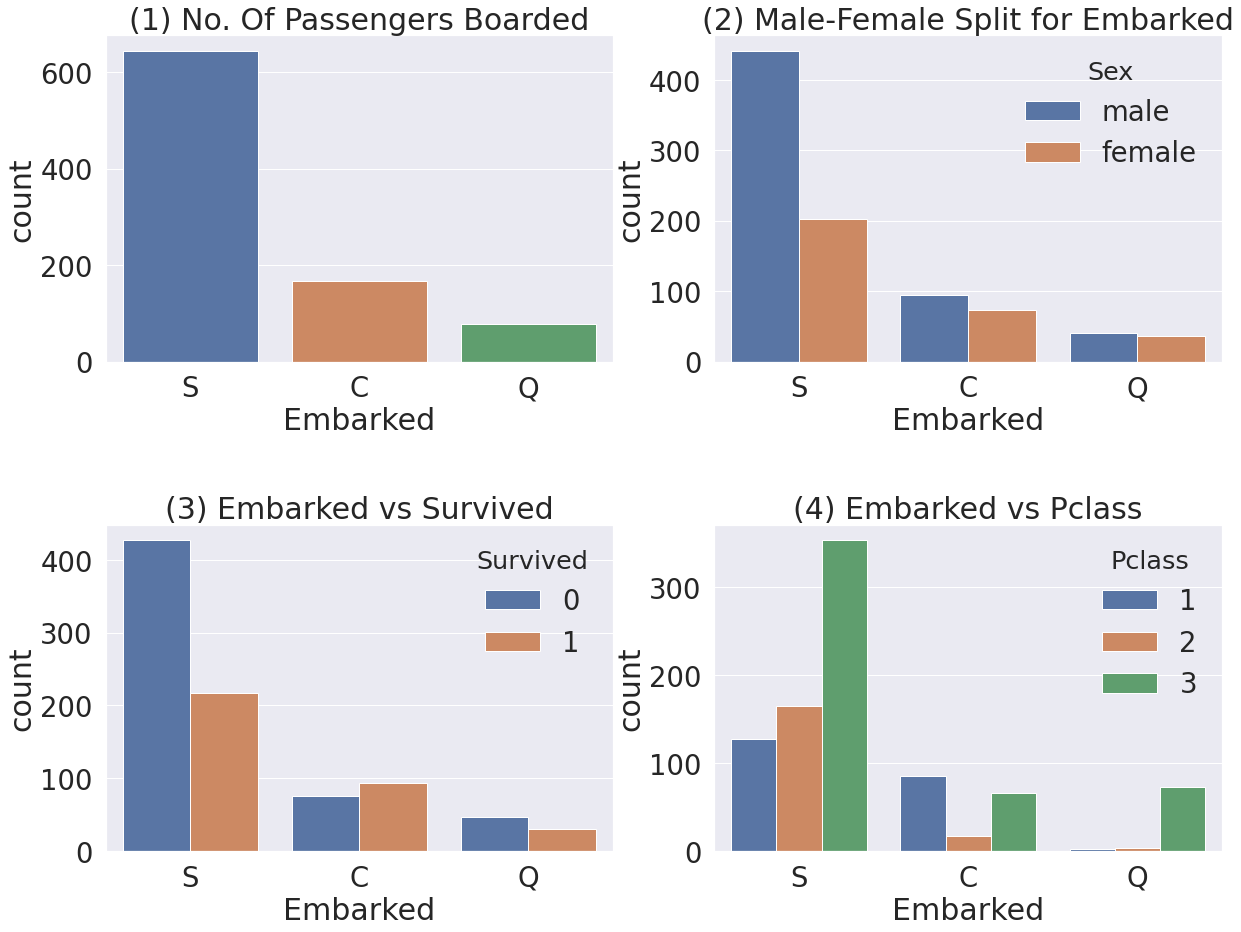

In [68]:
f,ax=plt.subplots(2, 2, figsize=(20,15))

sns.countplot('Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')

sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')

sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')

sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')

# 좌우, 상하 간격 조정
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Family - SibSp + Parch

In [69]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1

In [70]:
print('Maximum size of Family:',df_train['FamilySize'].max())
print('Minimum size of Family:',df_train['FamilySize'].min())

Maximum size of Family: 11
Minimum size of Family: 1


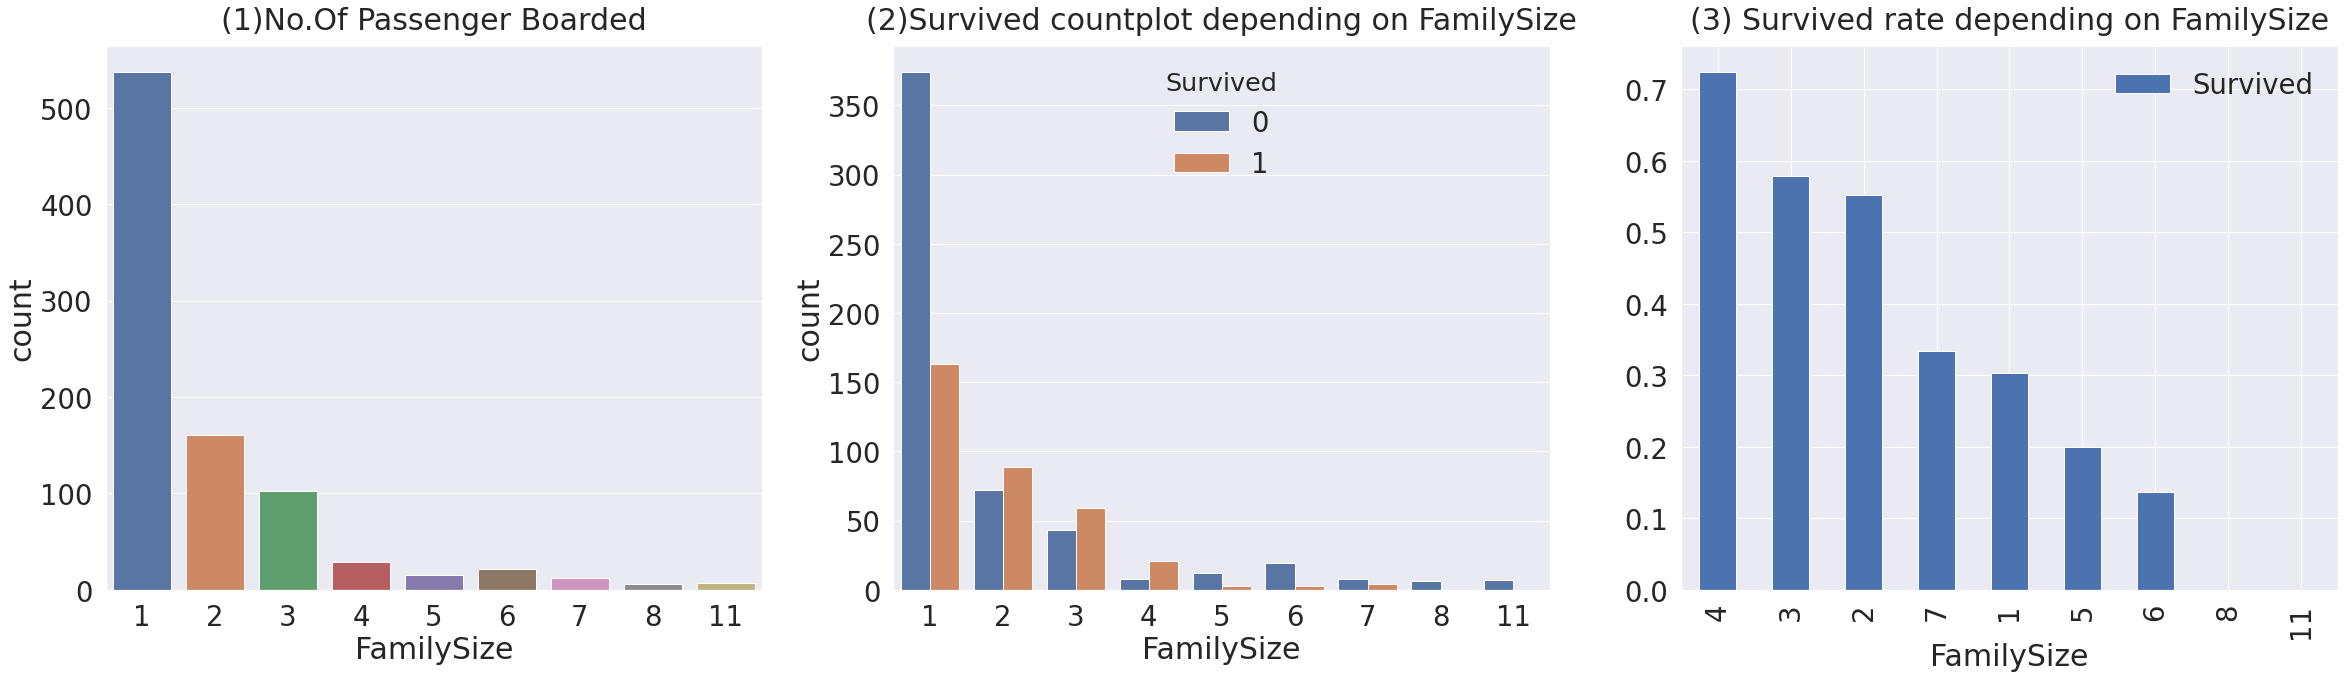

In [71]:
f, ax=plt.subplots(1,3,figsize=(40,10))
sns.countplot('FamilySize',data=df_train,ax=ax[0])
ax[0].set_title('(1)No.Of Passenger Boarded',y=1.02)

sns.countplot('FamilySize',hue='Survived',data=df_train, ax=ax[1])
ax[1].set_title('(2)Survived countplot depending on FamilySize', y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize',  y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Fare

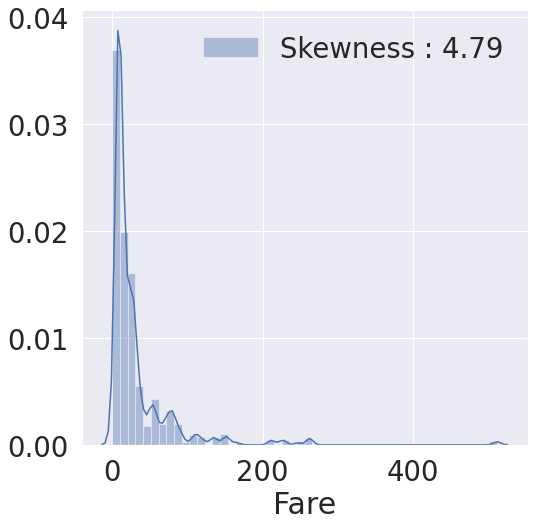

In [72]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
# skewness : distribution 좌측으로 치우치면 양수, 우측: 음수
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

In [73]:
# testset 에 있는 nan value 를 평균값으로 치환함
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()

# lambda 함수 -> log 값 취하기
df_train['Fare']=df_train['Fare'].map(lambda i: np.log(i) if i>0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

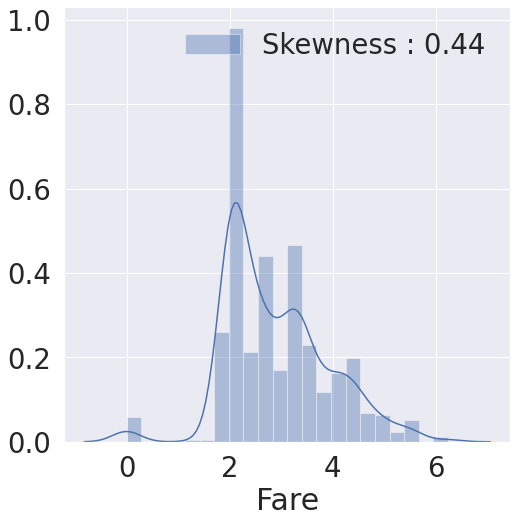

In [74]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

## 2.9 Cabin

In [75]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1


In [76]:
df_train['Ticket'].value_counts()

CA. 2343         7
347082           7
1601             7
3101295          6
347088           6
                ..
112052           1
113792           1
14973            1
SC/PARIS 2133    1
SC/PARIS 2146    1
Name: Ticket, Length: 681, dtype: int64

In [77]:
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()

df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

## 3. Feature engineering

## 3.1 Fill Null

In [79]:
df_train['Initial']= df_train.Name.str.extract('([A-Za-z]+)\.')
    
df_test['Initial']= df_test.Name.str.extract('([A-Za-z]+)\.')

In [80]:
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [81]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

In [82]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,1.190112,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,1.085686,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,0.932798,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,1.207905,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,0.958425,1.222222


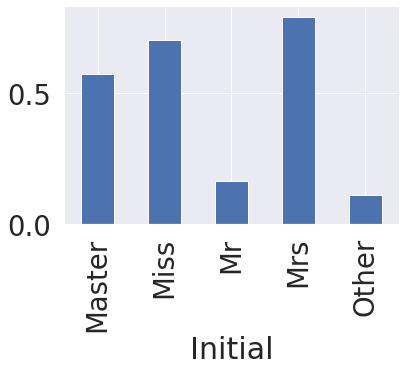

In [83]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()

In [84]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,1.190112,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,1.085686,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,0.932798,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,1.207905,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,0.958425,1.222222


In [85]:
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'),'Age'] = 33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'),'Age'] = 36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'),'Age'] = 5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'),'Age'] = 22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'),'Age'] = 46

df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mr'),'Age'] = 33
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mrs'),'Age'] = 36
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Master'),'Age'] = 5
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Miss'),'Age'] = 22
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Other'),'Age'] = 46

In [86]:
print('Embarked has ', sum(df_train['Embarked'].isnull()), ' Null values')

Embarked has  2  Null values


In [87]:
df_train['Embarked'].fillna('S', inplace=True)

In [88]:
df_train['Age_cat'] = 0
df_train.loc[df_train['Age'] < 10, 'Age_cat'] = 0
df_train.loc[(10 <= df_train['Age']) & (df_train['Age'] < 20), 'Age_cat'] = 1
df_train.loc[(20 <= df_train['Age']) & (df_train['Age'] < 30), 'Age_cat'] = 2
df_train.loc[(30 <= df_train['Age']) & (df_train['Age'] < 40), 'Age_cat'] = 3
df_train.loc[(40 <= df_train['Age']) & (df_train['Age'] < 50), 'Age_cat'] = 4
df_train.loc[(50 <= df_train['Age']) & (df_train['Age'] < 60), 'Age_cat'] = 5
df_train.loc[(60 <= df_train['Age']) & (df_train['Age'] < 70), 'Age_cat'] = 6
df_train.loc[70 <= df_train['Age'], 'Age_cat'] = 7

df_test['Age_cat'] = 0
df_test.loc[df_test['Age'] < 10, 'Age_cat'] = 0
df_test.loc[(10 <= df_test['Age']) & (df_test['Age'] < 20), 'Age_cat'] = 1
df_test.loc[(20 <= df_test['Age']) & (df_test['Age'] < 30), 'Age_cat'] = 2
df_test.loc[(30 <= df_test['Age']) & (df_test['Age'] < 40), 'Age_cat'] = 3
df_test.loc[(40 <= df_test['Age']) & (df_test['Age'] < 50), 'Age_cat'] = 4
df_test.loc[(50 <= df_test['Age']) & (df_test['Age'] < 60), 'Age_cat'] = 5
df_test.loc[(60 <= df_test['Age']) & (df_test['Age'] < 70), 'Age_cat'] = 6
df_test.loc[70 <= df_test['Age'], 'Age_cat'] = 7

In [89]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7    
    
df_train['Age_cat_2'] = df_train['Age'].apply(category_age)

In [90]:
print('1번 방법, 2번 방법 둘다 같은 결과를 내면 True 줘야함 -> ', (df_train['Age_cat'] == df_train['Age_cat_2']).all())

1번 방법, 2번 방법 둘다 같은 결과를 내면 True 줘야함 ->  True


In [91]:
df_train.drop(['Age', 'Age_cat_2'], axis=1, inplace=True)
df_test.drop(['Age'], axis=1, inplace=True)

## 3.3 Change Initial, Embarked and Sex (string to numerical)

In [92]:
df_train['Initial'] = df_train['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})
df_test['Initial'] = df_test['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})

In [93]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [94]:
df_train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [95]:
df_train['Embarked'] = df_train['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df_test['Embarked'] = df_test['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [96]:
df_train['Embarked'].isnull().any()

False

In [97]:
df_train['Sex'] = df_train['Sex'].map({'female': 0, 'male': 1})
df_test['Sex'] = df_test['Sex'].map({'female': 0, 'male': 1})

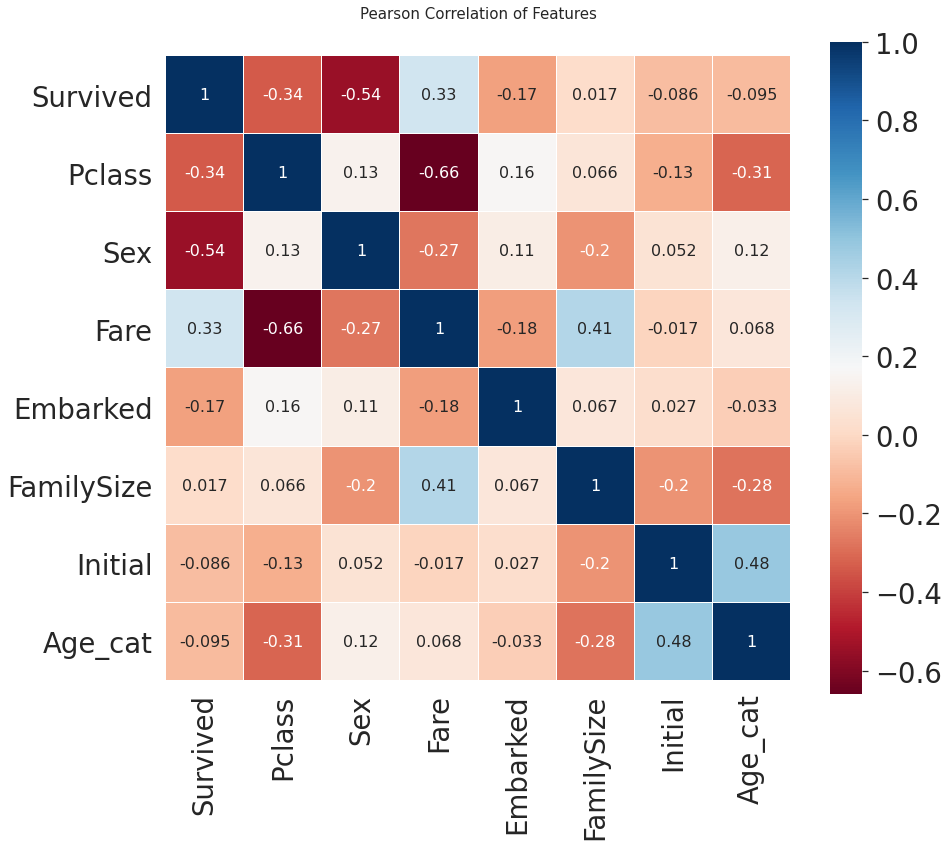

In [98]:
heatmap_data = df_train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySize', 'Initial', 'Age_cat']] 

colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})

del heatmap_data

In [99]:
df_train = pd.get_dummies(df_train, columns=['Initial'], prefix='Initial')
df_test = pd.get_dummies(df_test, columns=['Initial'], prefix='Initial')

In [100]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,0.683603,NaN,2,2,2,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,1.450832,C85,0,2,3,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,0.727559,NaN,2,1,2,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,1.379314,C123,2,2,3,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,0.735091,NaN,2,1,3,0,0,1,0,0


In [101]:
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked')
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')

## 3.5 Drop columns

In [102]:
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Name',  'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [103]:
df_train.head()

,Survived,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,0.683603,2,2,0,0,1,0,0,0,0,1
1,1,1,0,1.450832,2,3,0,0,0,1,0,1,0,0
2,1,3,0,0.727559,1,2,0,1,0,0,0,0,0,1
3,1,1,0,1.379314,2,3,0,0,0,1,0,0,0,1
4,0,3,1,0.735091,1,3,0,0,1,0,0,0,0,1


In [104]:
df_test.head()

,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,3,1,0.721667,1,3,0,0,1,0,0,0,1,0
1,3,0,0.665730,2,4,0,0,0,1,0,0,0,1
2,2,1,0.820148,1,6,0,0,1,0,0,0,1,0
3,3,1,0.769647,1,2,0,0,1,0,0,0,0,1
4,3,0,0.919718,3,2,0,0,0,1,0,0,0,1


## 4. Building machine learning model and prediction using the trained model

In [105]:
from sklearn.ensemble import RandomForestClassifier
# 모델의 평가
from sklearn import metrics
# training set 을 쉽게 나눠주는 함수
from sklearn.model_selection import train_test_split

## 4.1 Preparation - Split dataset into train, valid, test set

In [106]:
X_train = df_train.drop('Survived', axis=1).values
target_label = df_train['Survived'].values
X_test = df_test.values

In [107]:
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size=0.3, random_state=2018)

## 4.2 Model generation and prediction

In [108]:
model = RandomForestClassifier()
model.fit(X_tr, y_tr)
prediction = model.predict(X_vld)

In [109]:
print('총 {}명 중 {:.2f}% 정확도로 생존을 맞춤'.format(y_vld.shape[0], 100 * metrics.accuracy_score(prediction, y_vld)))

총 268명 중 83.21% 정확도로 생존을 맞춤


## 4.3 Feature importance

In [110]:
from pandas import Series

feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index=df_test.columns)

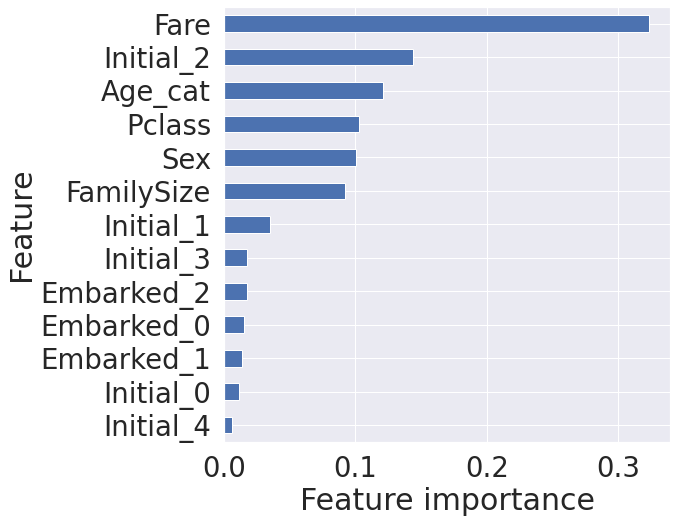

In [111]:
plt.figure(figsize=(8, 8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

## 4.4 Prediction on Test set

In [112]:
submission = pd.read_csv('../input/titanic/gender_submission.csv')

In [113]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [114]:
prediction = model.predict(X_test)
submission['Survived'] = prediction

In [115]:
submission.to_csv('./my_first_submission.csv', index=False)